<a id='biblioteki'></a>

### Biblioteki

In [130]:
# bazowe biblioteki
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# pozostałe biblioteki
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from mlxtend import plotting
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

<a id='spis_tresci'></a>

### Spis treści
- [Eksploracja danych](#eksploracja_danych)
- [Wnioski po eksploracja danych](#wnioski_po_eksploracji_danych)
- [Lasy losowe - model nr 1](#lasy_klasyfikacja_8_normal_normal_0-10)
- [Wnioski po modelu nr 1](#wnioski_po_modelu_nr_1)
- [Lasy losowe - model nr 2](#lasy_klasyfikacja_8_normal_normal_1-3)  
- [Lasy losowe - model nr 3](#lasy_klasyfikacja_12_randomsearch_normal_1-3) 
- [Lasy losowe - model nr 4](#lasy_klasyfikacja_12_randomsearch_standarized_1-3)

<a id='eksploracja_danych'></a>

### Eksploracja danych

In [3]:
# import danych i podgląd
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# wydruk nazw kolumn
for i in df.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [5]:
dict_colums_names = {
                    "fixed acidity": "kwasowość_stała",
                    "volatile acidity": "kwasowość_lotna",
                    "citric acid": "kwas_cytrynowy",
                    "residual sugar": "cukier_resztkowy",
                    "chlorides": "chlorki",
                    "free sulfur dioxide": "wolny_dwutlenek_siarki",
                    "total sulfur dioxide": "całkowity_dwutlenek_siarki",
                    "density": "gęstość",
                    "pH": "pH",
                    "sulphates": "siarczany",
                    "alcohol": "alkohol",
                    "quality": "jakość",    
                    }

In [6]:
df.rename(columns=dict_colums_names, inplace=True)
df


,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# sprawdzenie czy mamy NaN
df.isna().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [8]:
# sprawdzenie czy mamy nulle
df.isnull().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [9]:
# sprawdzenie typu kolumn
df.dtypes

kwasowość_stała               float64
kwasowość_lotna               float64
kwas_cytrynowy                float64
cukier_resztkowy              float64
chlorki                       float64
wolny_dwutlenek_siarki        float64
całkowity_dwutlenek_siarki    float64
gęstość                       float64
pH                            float64
siarczany                     float64
alkohol                       float64
jakość                          int64
dtype: object

In [10]:
# sprawdzenie statystyk
df.describe().apply(lambda x: round(x, 2))

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kwasowość_stała             1599 non-null   float64
 1   kwasowość_lotna             1599 non-null   float64
 2   kwas_cytrynowy              1599 non-null   float64
 3   cukier_resztkowy            1599 non-null   float64
 4   chlorki                     1599 non-null   float64
 5   wolny_dwutlenek_siarki      1599 non-null   float64
 6   całkowity_dwutlenek_siarki  1599 non-null   float64
 7   gęstość                     1599 non-null   float64
 8   pH                          1599 non-null   float64
 9   siarczany                   1599 non-null   float64
 10  alkohol                     1599 non-null   float64
 11  jakość                      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


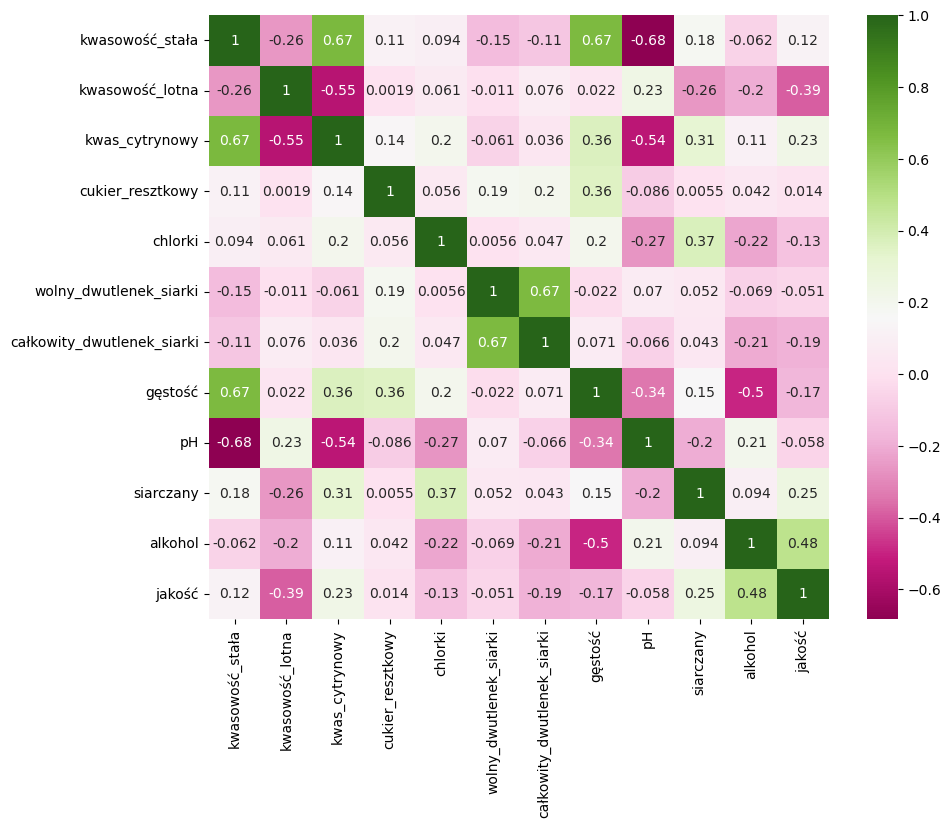

In [12]:
# sprawdzenie korelacji
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

# najwieksza pozytywna korelacje na jakosc wina ma alkohol
# najwieksza negatywna korelacje na jakosci wina ma kwasowosc lotna

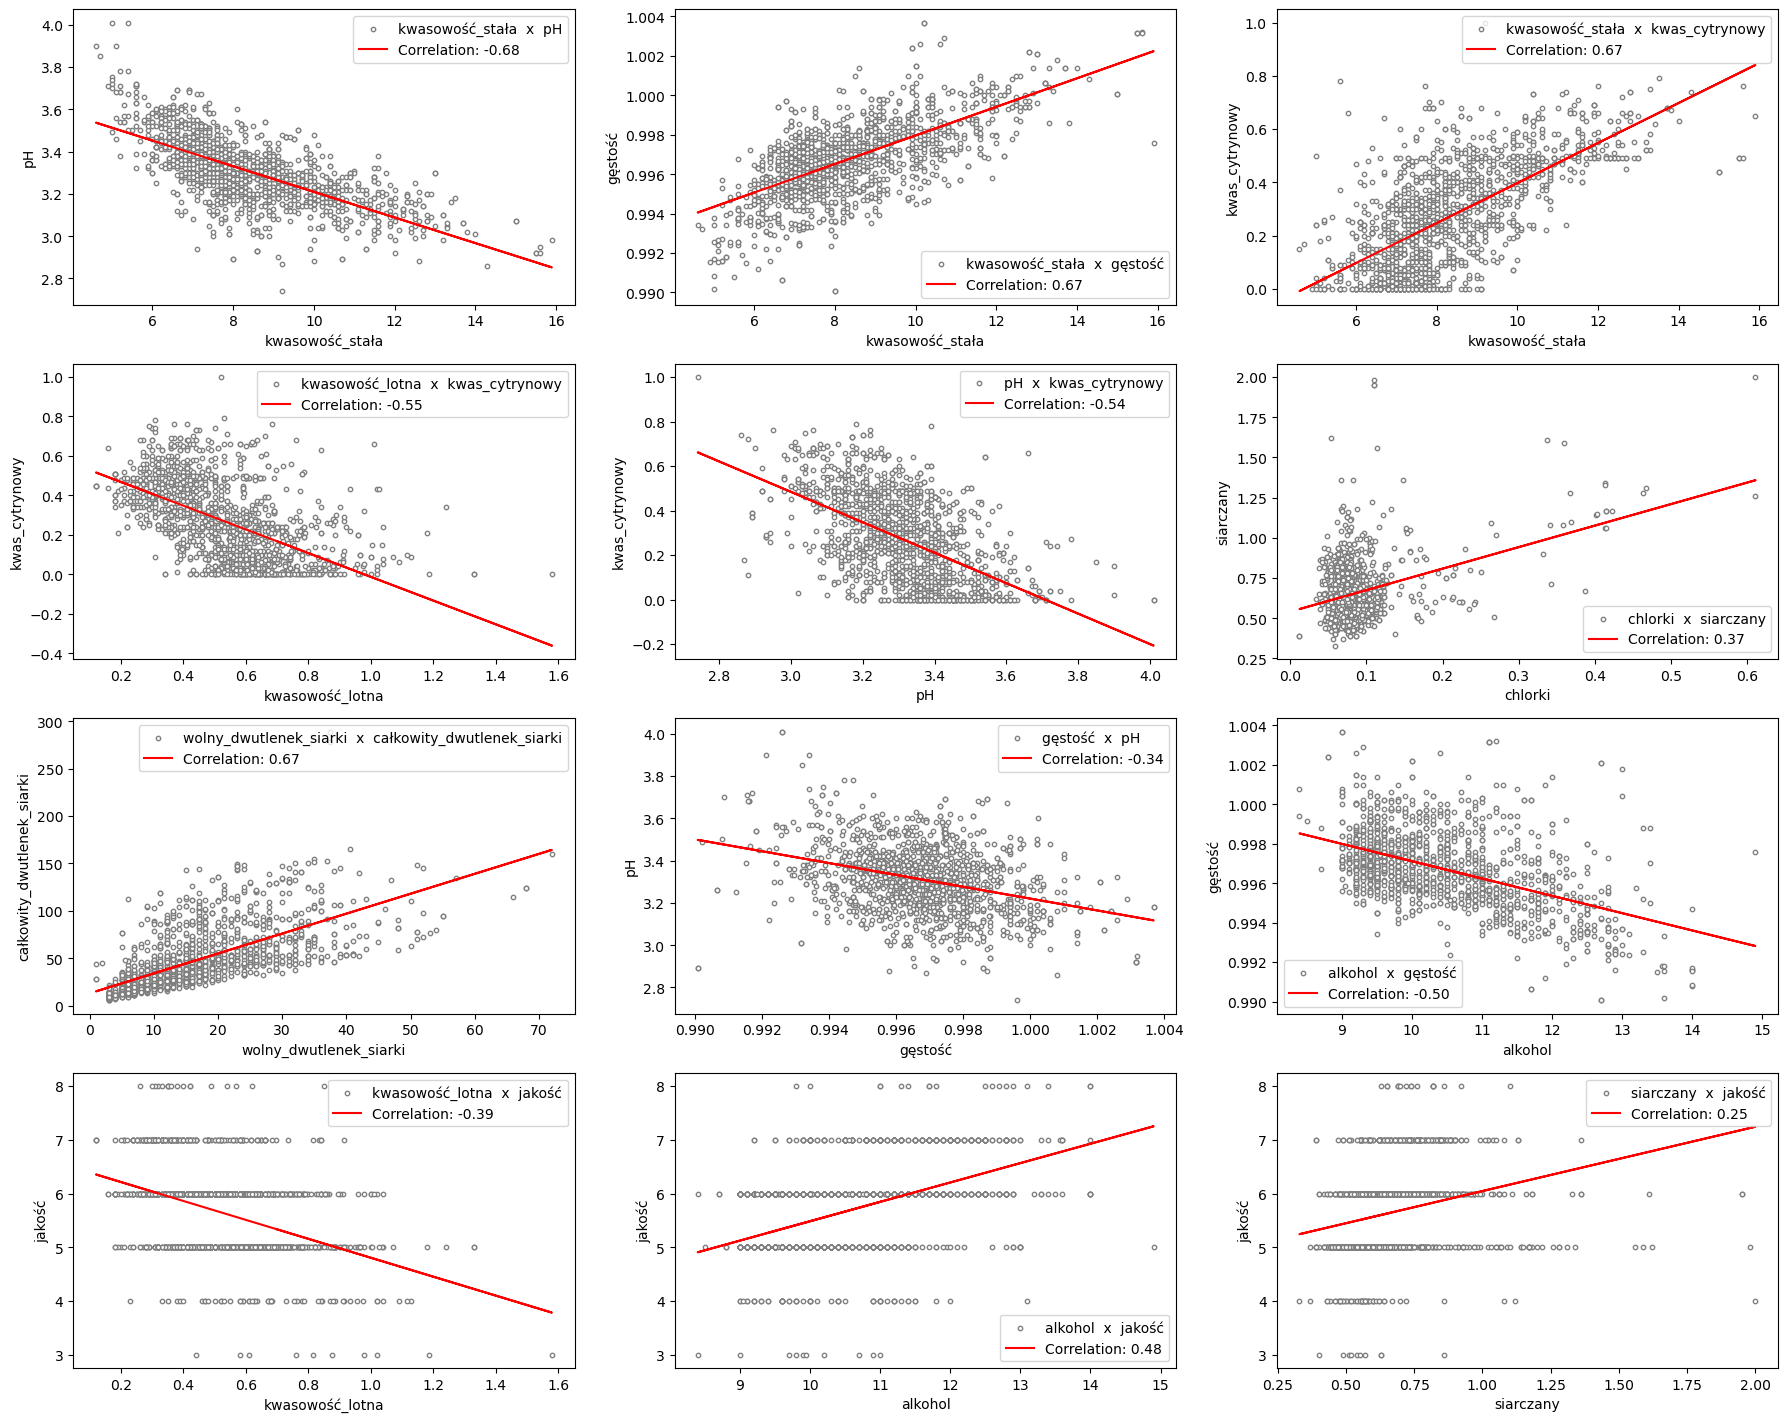

In [13]:
# narysowanie pary wykresów z największą korelacją
data = [
        (df["kwasowość_stała"], df["pH"], 'kwasowość_stała  x  pH'),
        (df["kwasowość_stała"], df["gęstość"], 'kwasowość_stała  x  gęstość'),
        (df["kwasowość_stała"], df["kwas_cytrynowy"], 'kwasowość_stała  x  kwas_cytrynowy'),
        
        (df["kwasowość_lotna"], df["kwas_cytrynowy"], 'kwasowość_lotna  x  kwas_cytrynowy'),
        (df["pH"], df["kwas_cytrynowy"], 'pH  x  kwas_cytrynowy'),
        (df["chlorki"], df["siarczany"], 'chlorki  x  siarczany'),
        
        (df["wolny_dwutlenek_siarki"], df["całkowity_dwutlenek_siarki"], 'wolny_dwutlenek_siarki  x  całkowity_dwutlenek_siarki'),
        (df["gęstość"], df["pH"], 'gęstość  x  pH'),
        (df["alkohol"], df["gęstość"], 'alkohol  x  gęstość'),
        
        (df["kwasowość_lotna"], df["jakość"], 'kwasowość_lotna  x  jakość'),
        (df["alkohol"], df["jakość"], 'alkohol  x  jakość'),
        (df["siarczany"], df["jakość"], 'siarczany  x  jakość'),
        ]


fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9),
      (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize = (22, 18), dpi=100)

for ax, (x, y, label) in zip((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12), data):
    ax.scatter(x, y, label=label, c='white', edgecolors="grey", s=10)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color='red', label='Correlation: {:.2f}'.format(np.corrcoef(x, y)[0, 1]))
    ax.legend()

plt.show()



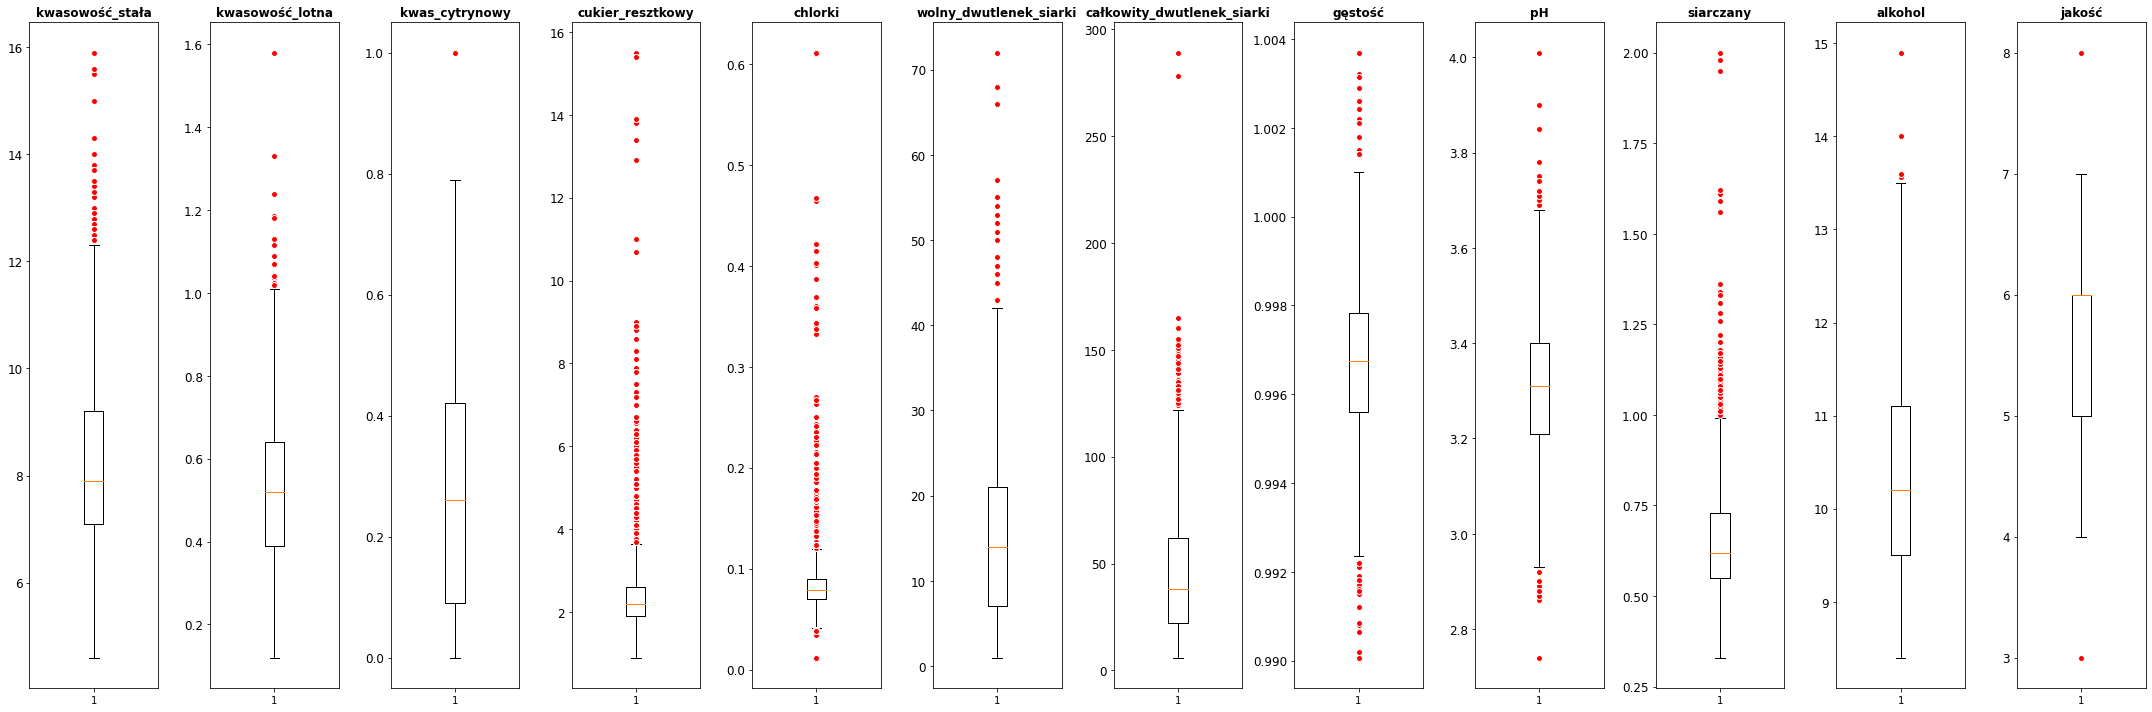

In [14]:
#box plot dla kazdej kolumny 
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [15]:
import plotly.express as px

In [16]:
for i in df.columns:
    nbins = 80
    fig = px.histogram(df, x=i,
                    marginal="box",
                    width=800, height=500,
                    title=i,
                    color_discrete_sequence=['#FF6692'],
                    nbins = nbins)


    fig.update_layout(
        font_family="Ubuntu",
        font_color="black",
        title_font_family="Ubuntu",
        title_font_color="black",
        title_font_size=25,
        yaxis_title_text="Ilość",
        xaxis_title_text=i
    )

    fig.show()

In [ ]:
# powyższe wykresy nie wyswietlaja sie na repozytorium

<a id='wnioski_po_eksploracji_danych'></a>

<span style="color:grey">

### Wnioski po eksploracji danych
- wydaje się, że całkowity dwutlenek siarki zachowuje się bardzo podobnie jak wolny dwutlenek siarki i ze mozna zrezygnowac z jednej z tych cech
- inne cechy, które być może warto wykluczyć ze względu na niskie zróżnicowanie zmiennej lub koncentrację wokół mody:
    - chlorki
    - cukier resztowy
    - gęstość
- najwiekszy wplyw na jakosc wina ma poziom alkoholu. wysoki poziom alkoholu oznacza, ze winogrono bylo dobrze naslonecznione i zawiralo duzo cukru
- pozytywny wplyw poza alkoholem, na jakosc wina maja:
    - siarczany
    - kwas cytrynowy
- negatywny wplyw na jakosc wina kwasowosc lotna
<span>


<a id='lasy_klasyfikacja_8_normal_normal_0-10'></a>

### Lasy losowe - model nr 1
+ Rodzaj modelu: <span style="color:orange">**Klasyfikacja**</span>
+ Ilość cech: <span style="color:orange">**12**</span>
+ Random search: <span style="color:orange">**Nie**</span>
+ Standaryzacja: <span style="color:orange">**Nie**</span>
+ Target: <span style="color:orange">**0-10**</span>

In [17]:
# zbudowanie bazowego modelu machine learing
# weryfikacja jakie cechy są istotne
# model bazowy będzie punktem odniesienia

In [18]:
# zmienne objasniajace - tylko ostatnia kolumna
X = df.iloc[:, :-1]
X

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [19]:
# zmienna objasniana - tylko ostatnia kolumna
Y = df.iloc[:, -1:].to_numpy().flatten()
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size=1/3)
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=None, bootstrap=True, random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [21]:
rf_classifier.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1791095845)

In [22]:
rf_classifier.score(X_test, y_test)

0.6810506566604128

In [23]:
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.72      0.81      0.76       225
           6       0.65      0.69      0.67       214
           7       0.64      0.48      0.55        66
           8       0.50      0.20      0.29         5

    accuracy                           0.68       533
   macro avg       0.42      0.36      0.38       533
weighted avg       0.65      0.68      0.66       533



In [145]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
alkohol,0.140066
siarczany,0.117425
kwasowość_lotna,0.110283
całkowity_dwutlenek_siarki,0.106708
gęstość,0.089012
pH,0.078694
chlorki,0.075804
kwasowość_stała,0.074033
kwas_cytrynowy,0.073082
cukier_resztkowy,0.069419


<a id='wnioski_po_modelu_nr_1'></a>

<span style="color:grey">

### Wnioski po modelu nr 1
- z danych testowych (oraz z wykresu częstości) wynika, że może mieć sens podzielenie targetu:
    - poniżej progu kontroli jakości: 0-4
    - wina standardowe: 5-6
    - wina wysokiej jakości: 7-10
- accuracy na poziomie 68% nie jest miarą zadowalajacą
- Na podstawie wcześniejszych analizy rozkładu zmiennych oraz wyników feature importance z dalszych analiz można wykluczyć następujące cechy:
    - cukier_resztkowy - niski feature importance i niskie zróżnicowanie
    - wolny dwutlenek siarki - niski feature importance i duza korealacja z całkowitym dwutlenkiem siarki
    - gęstość - niskie zróżńicowanie, zerowe odchylenie standardowe
    - chlorki - niskie zróżcniowanie, niskie odchylenie standardowe

<br> `Problem z przewidzeniem najniższej jakości wina`
<br> `Zmniejszenie ilości kolumn z cechami nie zwiększa efektywności modelu`


**TO DO**
1. standardyzacja danych
2. użycie modelów regresji
3. użycie gridtest / random search
4. szukanie optymalnych paramtergów dla każdego z modeli
5. wykorzystanie pipeline?
<span>

<a id='lasy_klasyfikacja_8_normal_normal_1-3'></a>

### Lasy losowe - model nr 2
+ Rodzaj modelu: <span style="color:orange">**Klasyfikacja**</span>
+ Ilość cech: <span style="color:orange">**8**</span>
+ Random search: <span style="color:orange">**Nie**</span>
+ Standaryzacja: <span style="color:orange">**Nie**</span>
+ Target: <span style="color:orange">**1-3**</span>

In [77]:
df = pd.read_csv('winequality-red.csv')
df.rename(columns=dict_colums_names, inplace=True)
df

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [78]:
df['jakość'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [79]:
df['jakość'] = df['jakość'].apply(lambda x: 1 if x >= 7 else 3 if x <= 4 else 2)
df

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [80]:
df['jakość'].unique()

array([2, 1, 3], dtype=int64)

In [81]:
df.drop(columns=["cukier_resztkowy", "wolny_dwutlenek_siarki", "gęstość", "chlorki"], axis='columns', inplace=True)
df.rename(columns={"całkowity_dwutlenek_siarki": "dwutlenek_siarki"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kwasowość_stała   1599 non-null   float64
 1   kwasowość_lotna   1599 non-null   float64
 2   kwas_cytrynowy    1599 non-null   float64
 3   dwutlenek_siarki  1599 non-null   float64
 4   pH                1599 non-null   float64
 5   siarczany         1599 non-null   float64
 6   alkohol           1599 non-null   float64
 7   jakość            1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


In [82]:
df.head(10)

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,dwutlenek_siarki,pH,siarczany,alkohol,jakość
0,7.4,0.70,0.00,34.0,3.51,0.56,9.4,2
1,7.8,0.88,0.00,67.0,3.20,0.68,9.8,2
2,7.8,0.76,0.04,54.0,3.26,0.65,9.8,2
3,11.2,0.28,0.56,60.0,3.16,0.58,9.8,2
4,7.4,0.70,0.00,34.0,3.51,0.56,9.4,2
5,7.4,0.66,0.00,40.0,3.51,0.56,9.4,2
6,7.9,0.60,0.06,59.0,3.30,0.46,9.4,2
7,7.3,0.65,0.00,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,102.0,3.35,0.80,10.5,2


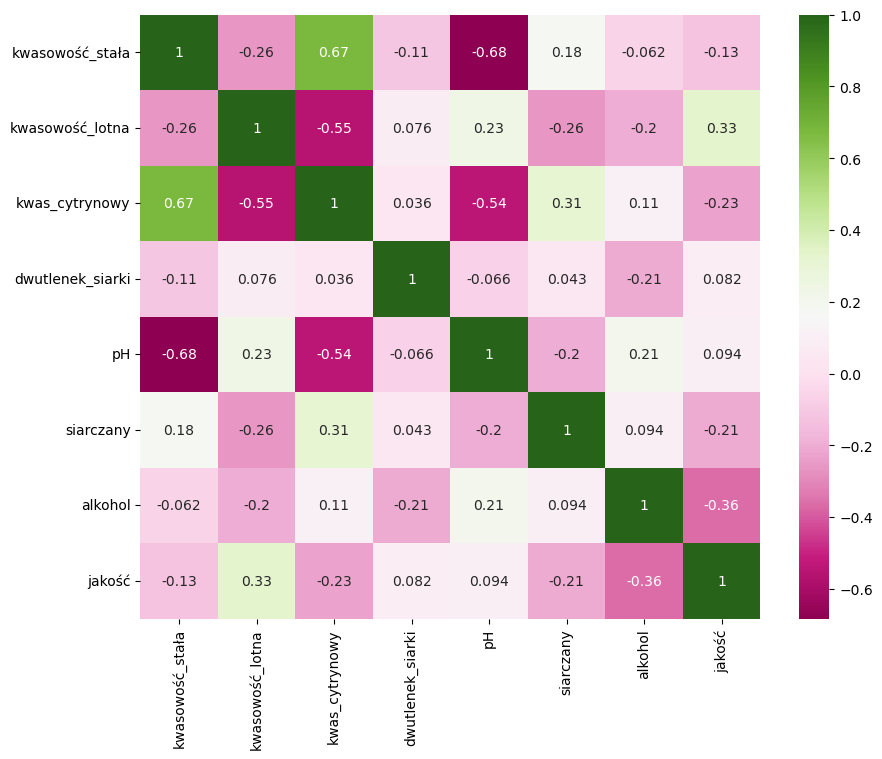

In [83]:
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

In [84]:
#sprawdzenie wyników po ferture engineering
X_2 = df.iloc[:, :-1]
Y_2 = df.iloc[:, -1:].to_numpy().flatten()
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, random_state = 1, test_size=1/3)
rf_classifier_2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=None, bootstrap=True, random_state=1)
rf_classifier_2.fit(X_train_2, y_train_2)
y_pred_2 = rf_classifier_2.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2, zero_division=0))

              precision    recall  f1-score   support

           1       0.69      0.51      0.59        71
           2       0.88      0.96      0.92       439
           3       0.00      0.00      0.00        23

    accuracy                           0.86       533
   macro avg       0.52      0.49      0.50       533
weighted avg       0.82      0.86      0.84       533



<a id='lasy_klasyfikacja_12_randomsearch_normal_1-3'></a>

### Lasy losowe - model nr 3
+ Rodzaj modelu: <span style="color:orange">**Klasyfikacja**</span>
+ Ilość cech: <span style="color:orange">**12**</span>
+ Random search: <span style="color:orange">**Tak**</span>
+ Standaryzacja: <span style="color:orange">**Nie**</span>
+ Target: <span style="color:orange">**1-3**</span>

In [118]:
param_grid = {"max_depth": list(range(1, 50)),
              "n_estimators": list(range(10, 200)),
              "min_samples_leaf": list(range(2, 20))}

In [123]:
df = pd.read_csv('winequality-red.csv')
df.rename(columns=dict_colums_names, inplace=True)
df['jakość'] = df['jakość'].apply(lambda x: 1 if x >= 7 else 3 if x <= 4 else 2)
df

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [124]:
X_3 = df.iloc[:, :-1]
Y_3 = df.iloc[:, -1:].to_numpy().flatten()
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, Y_3, random_state = 1, test_size=1/3)
rf_classifier_3 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=True, random_state=1)
random_search = RandomizedSearchCV(rf_classifier_3, param_distributions=param_grid, cv=5, verbose=1, random_state=1, random_state=1)
random_search.fit(X_train_3, y_train_3)
y_pred_3 = random_search.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3, zero_division=0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           1       0.70      0.44      0.54        71
           2       0.87      0.97      0.92       439
           3       0.00      0.00      0.00        23

    accuracy                           0.86       533
   macro avg       0.53      0.47      0.49       533
weighted avg       0.81      0.86      0.83       533



In [125]:
random_search.best_estimator_

RandomForestClassifier(max_depth=28, min_samples_leaf=2, n_estimators=156,
                       random_state=1)

<a id='lasy_klasyfikacja_12_randomsearch_standarized_1-3'></a>

### Lasy losowe - model nr 4
+ Rodzaj modelu: <span style="color:orange">**Klasyfikacja**</span>
+ Ilość cech: <span style="color:orange">**12**</span>
+ Random search: <span style="color:orange">**Tak**</span>
+ Standaryzacja: <span style="color:orange">**Tak**</span>
+ Target: <span style="color:orange">**1-3**</span>

In [133]:
# skalowanie danych
data_to_be_standarized = df.iloc[:, :-1]
scaler = StandardScaler()
df_standarized = scaler.fit(data_to_be_standarized).transform(data_to_be_standarized)
df_standarized

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [136]:
param_grid = {"max_depth": list(range(1, 50)),
              "n_estimators": list(range(10, 200)),
              "min_samples_leaf": list(range(2, 20))}

In [138]:
X_4 = df_standarized
Y_4 = df.iloc[:, -1:].to_numpy().flatten()
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, Y_4, random_state = 1, test_size=1/3)
rf_classifier_4 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', bootstrap=True, random_state=1)
random_search = RandomizedSearchCV(rf_classifier_4, param_distributions=param_grid, cv=5, verbose=1, random_state=1)
random_search.fit(X_train_4, y_train_4)
y_pred_4 = random_search.predict(X_test_4)
print(classification_report(y_test_4, y_pred_4, zero_division=0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           1       0.64      0.41      0.50        71
           2       0.87      0.96      0.91       439
           3       0.00      0.00      0.00        23

    accuracy                           0.85       533
   macro avg       0.50      0.46      0.47       533
weighted avg       0.80      0.85      0.82       533



In [139]:
y_pred_train_4 = random_search.predict(X_train_4)
print(classification_report(y_train_4, y_pred_train_4, zero_division=0))

              precision    recall  f1-score   support

           1       0.96      0.75      0.84       146
           2       0.92      0.99      0.96       880
           3       1.00      0.05      0.10        40

    accuracy                           0.93      1066
   macro avg       0.96      0.60      0.63      1066
weighted avg       0.93      0.93      0.91      1066



In [144]:
df.groupby(['jakość'])["jakość"].count()

jakość
1     217
2    1319
3      63
Name: jakość, dtype: int64

Model być może jest lekko prztrenowany, zobaczymy jakie wyniki wyjdą na regresji liniowej